In [2]:
import json

import matplotlib.pyplot as plt
import pandas as pd

# Data analysis of all sets in MTG history

SetList.json contains information on all the set release during MTG's history since 1993 until today.  

In [3]:
with open("./SetList.json", encoding="utf8") as data_file:
    data = json.load(data_file)
    default_df = pd.json_normalize(data, "data").assign(**data["meta"])

## Quick overview

In [4]:
print(default_df.size)
print(default_df.shape)
print(default_df.columns)

17550
(702, 25)
Index(['baseSetSize', 'code', 'isFoilOnly', 'isOnlineOnly', 'keyruneCode',
       'languages', 'name', 'releaseDate', 'totalSetSize', 'type', 'block',
       'isNonFoilOnly', 'sealedProduct', 'mcmId', 'mcmName',
       'tcgplayerGroupId', 'tokenSetCode', 'parentCode', 'cardsphereSetId',
       'mcmIdExtras', 'mtgoCode', 'isPartialPreview', 'isForeignOnly', 'date',
       'version'],
      dtype='object')


## What are the different type of sets ?

Text(0, 0.5, '')

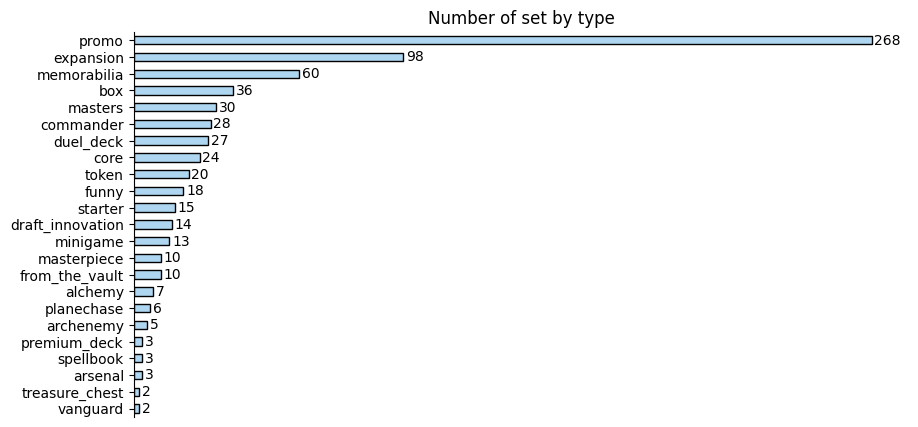

In [5]:
df = default_df.value_counts("type", ascending=True)


fig, axes = plt.subplots(nrows=1)
fig.set_size_inches(10, 5)


for side in ["top", "bottom", "right"]:
    axes.spines[f"{side}"].set_visible(False)


plot = df.plot(kind="barh", rot=0, ax=axes, edgecolor="k", color="#AED6F1")
plot.tick_params("x", which="both", bottom=False, labelbottom=False)
plot.bar_label(plot.containers[0], padding=2)
plot.set_title("Number of set by type")
plot.set_ylabel("")